<a href="https://colab.research.google.com/github/MLDreamer/Linkedin-posts/blob/main/Seasonality_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🏪 Generating Retail Data for Analysis...
✅ Generated 2190 data points across 3 store types
📅 Date range: 2022-01-01 00:00:00 to 2023-12-31 00:00:00


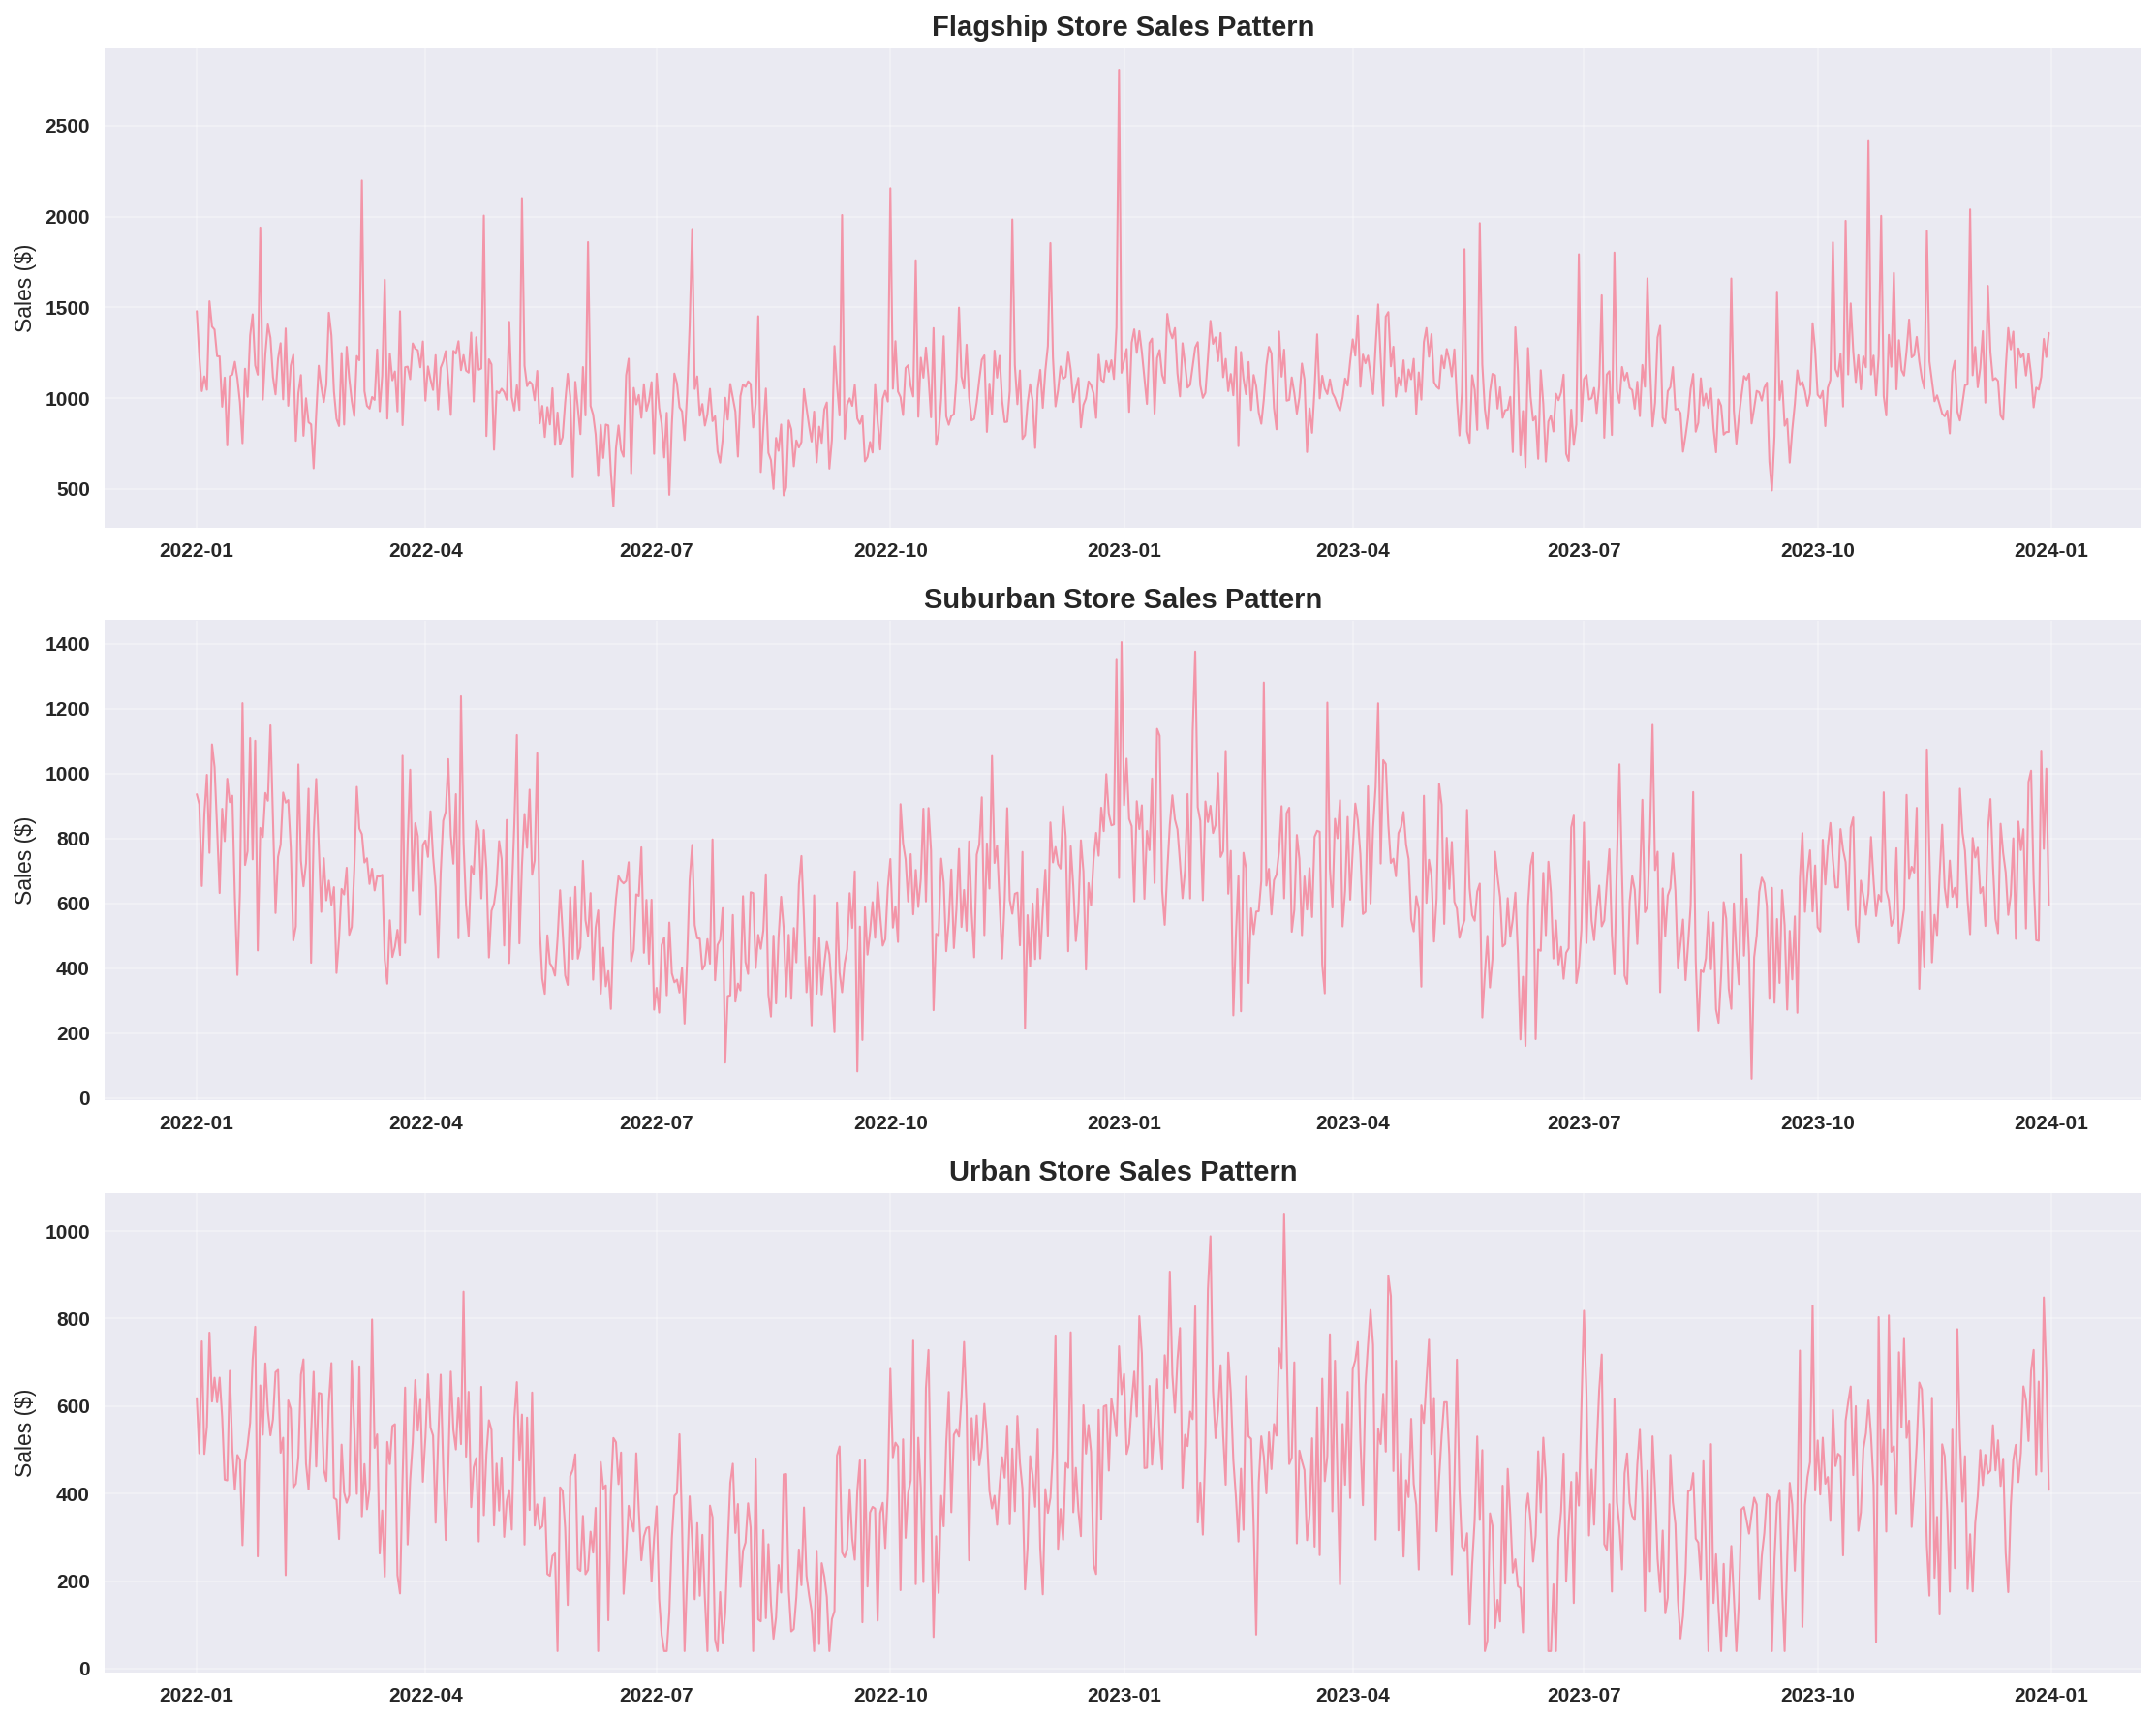

🔧 Seasonality Detection Framework Ready!
🚀 Starting Comprehensive Seasonality Analysis...

📊 Analyzing Flagship Store Data...
  • Testing baseline model (no seasonality)...
  • Testing classical decomposition...
  • Testing STL decomposition...
  • Testing Fourier transform analysis...
  • Testing wavelet analysis...
  • Testing multiplicative seasonality...
  • Testing additive seasonality...

📊 Analyzing Suburban Store Data...
  • Testing baseline model (no seasonality)...
  • Testing classical decomposition...
  • Testing STL decomposition...
  • Testing Fourier transform analysis...
  • Testing wavelet analysis...
  • Testing multiplicative seasonality...
  • Testing additive seasonality...

📊 Analyzing Urban Store Data...
  • Testing baseline model (no seasonality)...
  • Testing classical decomposition...
  • Testing STL decomposition...
  • Testing Fourier transform analysis...
  • Testing wavelet analysis...
  • Testing multiplicative seasonality...
  • Testing additive seasona

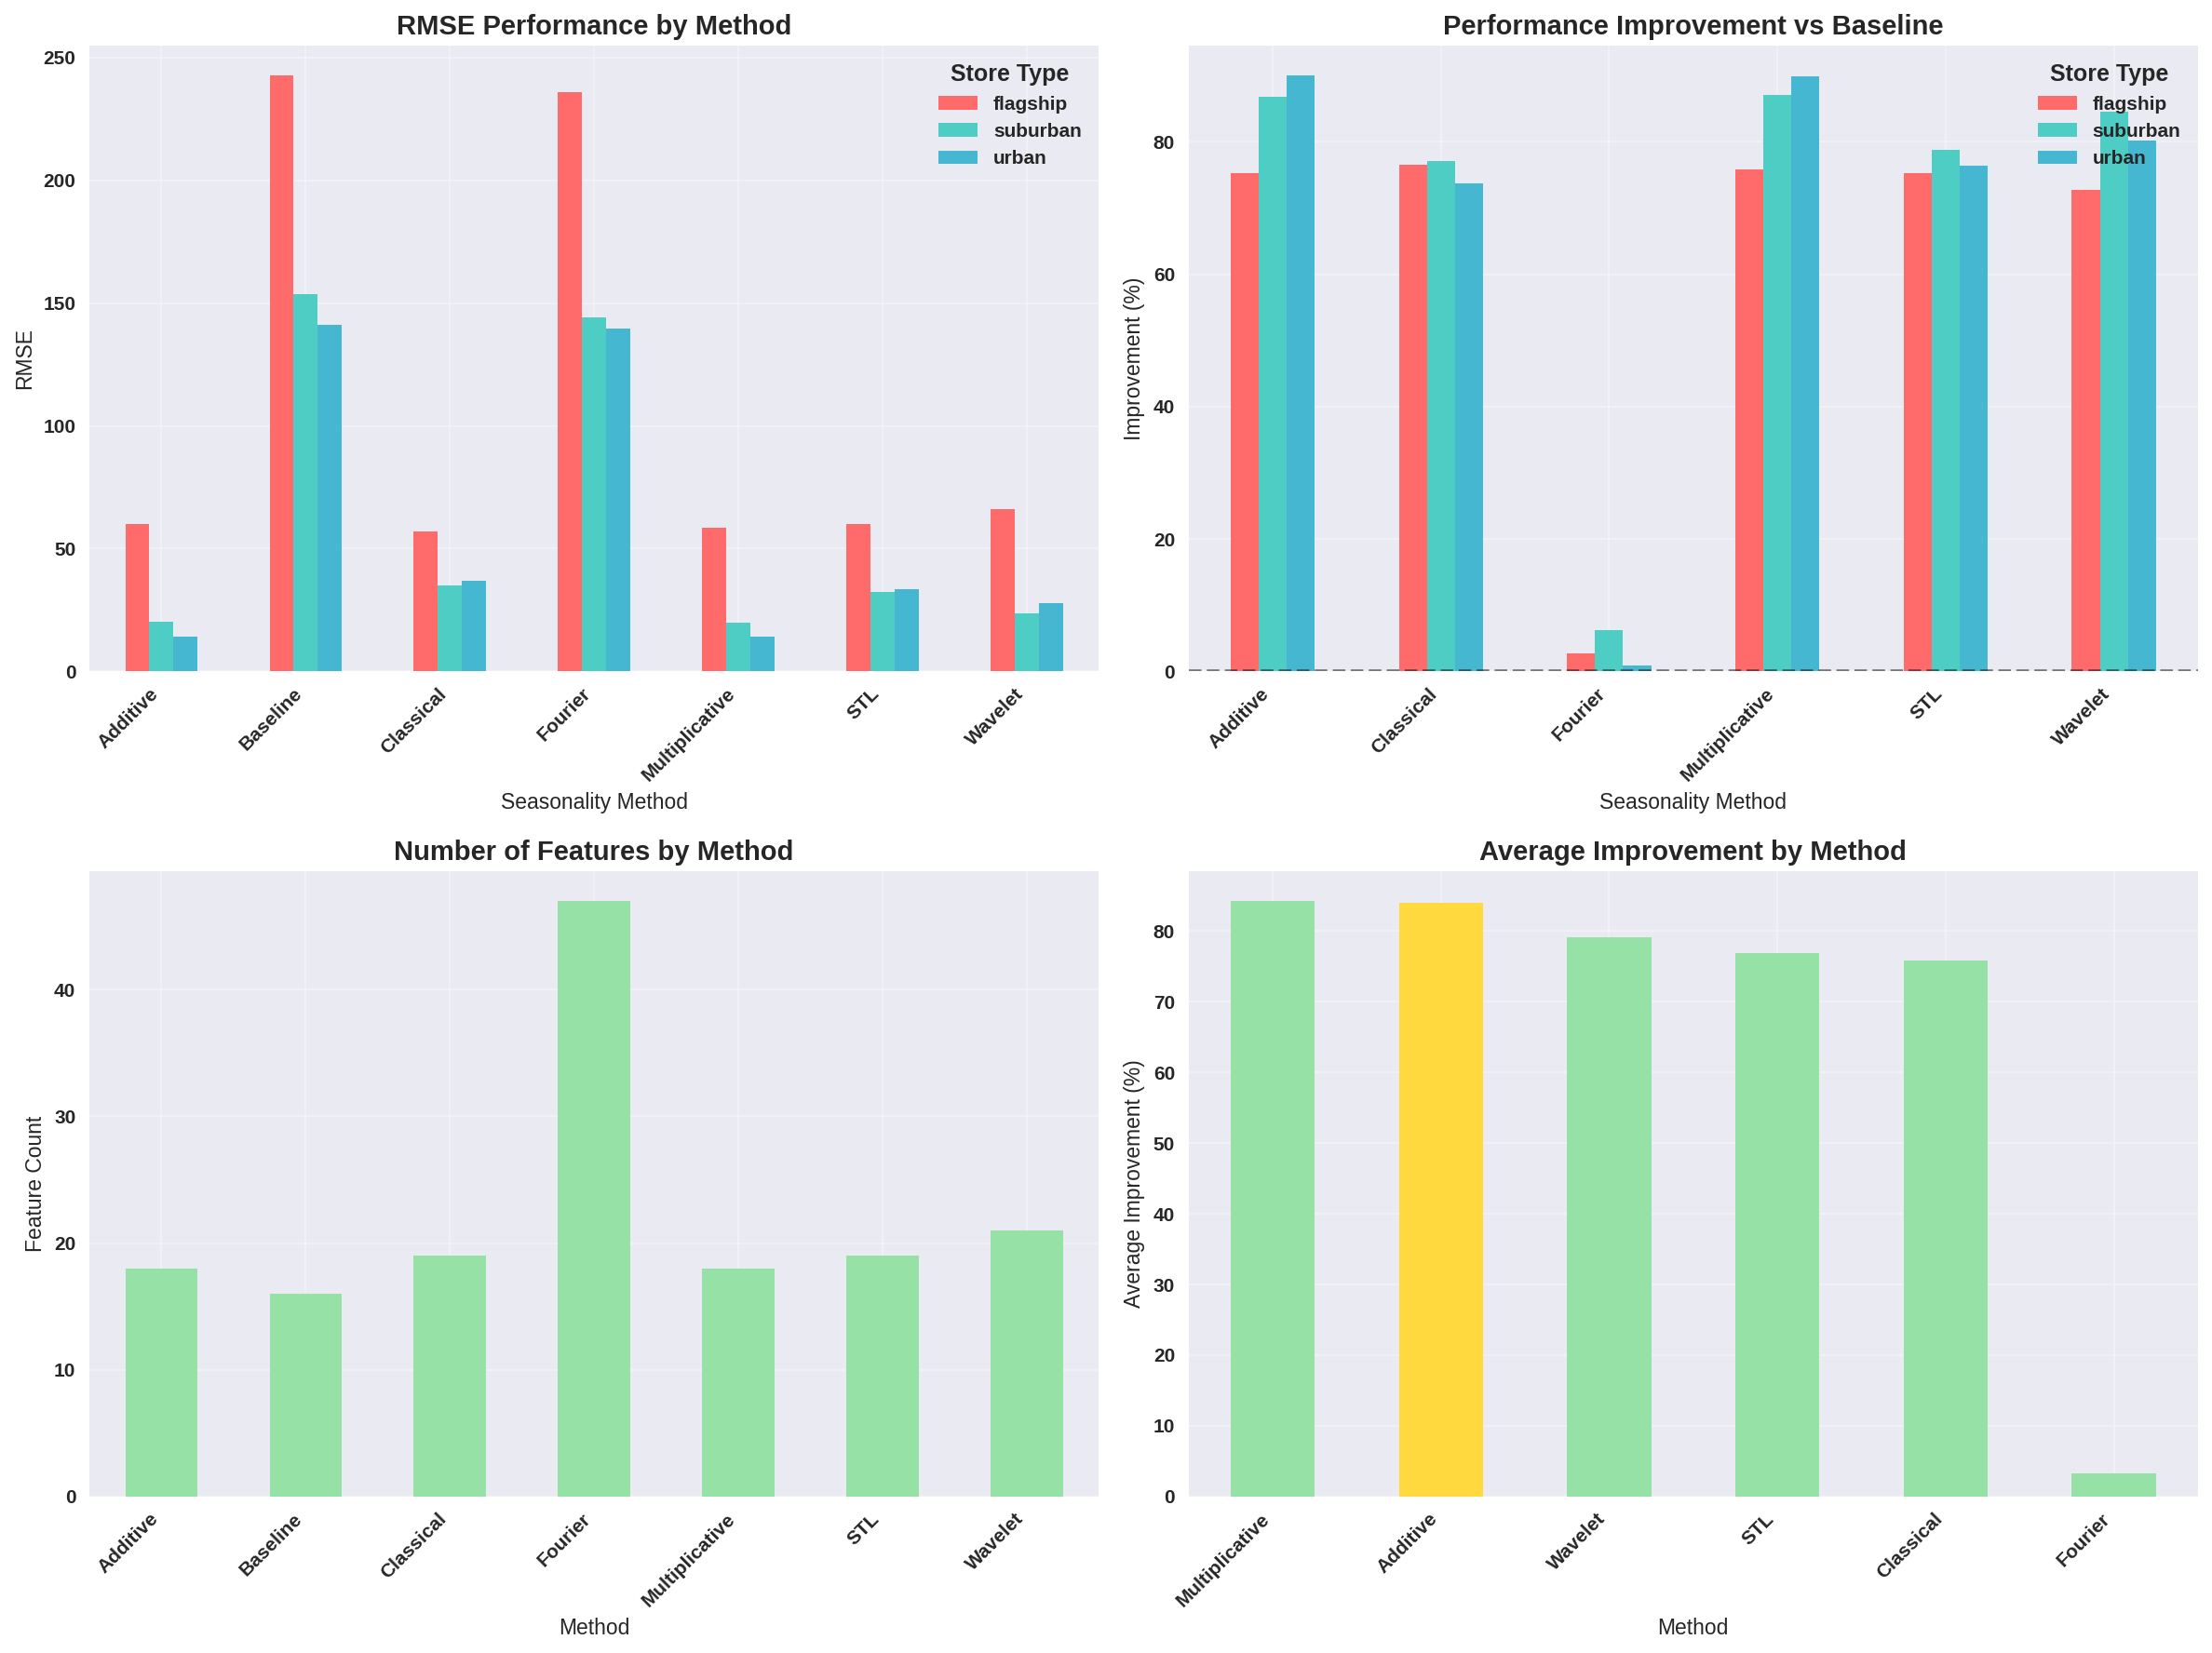

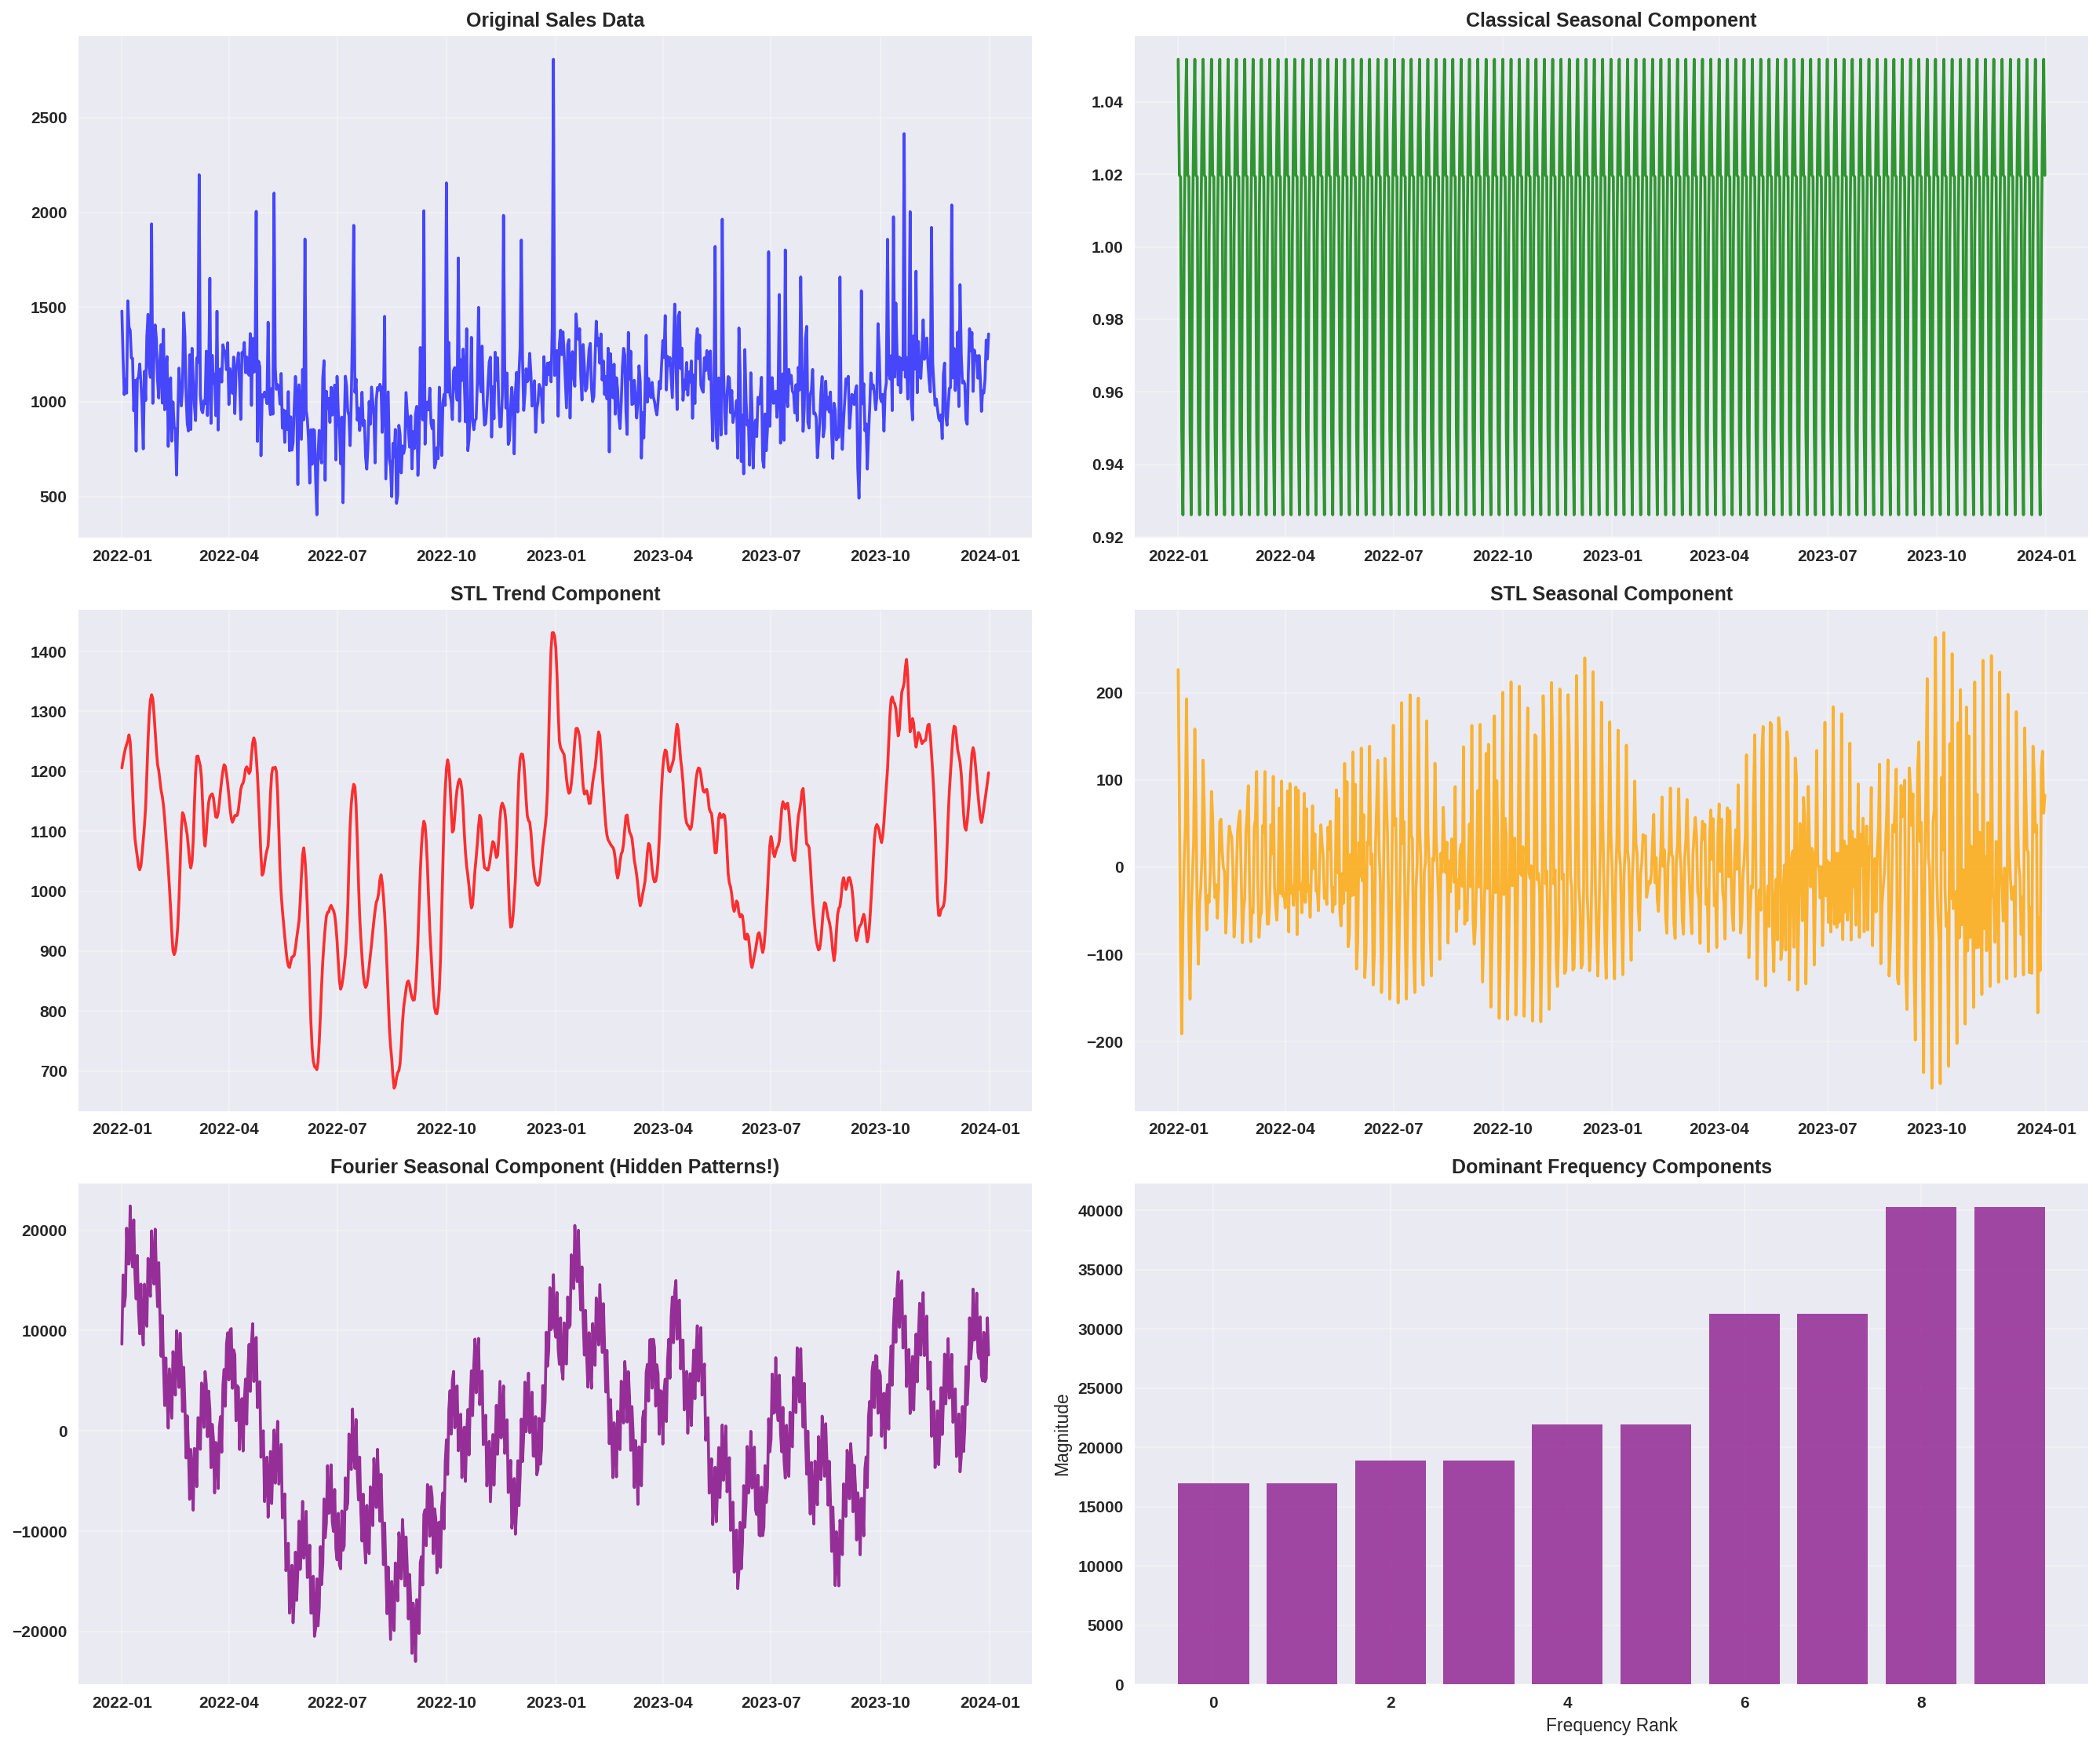

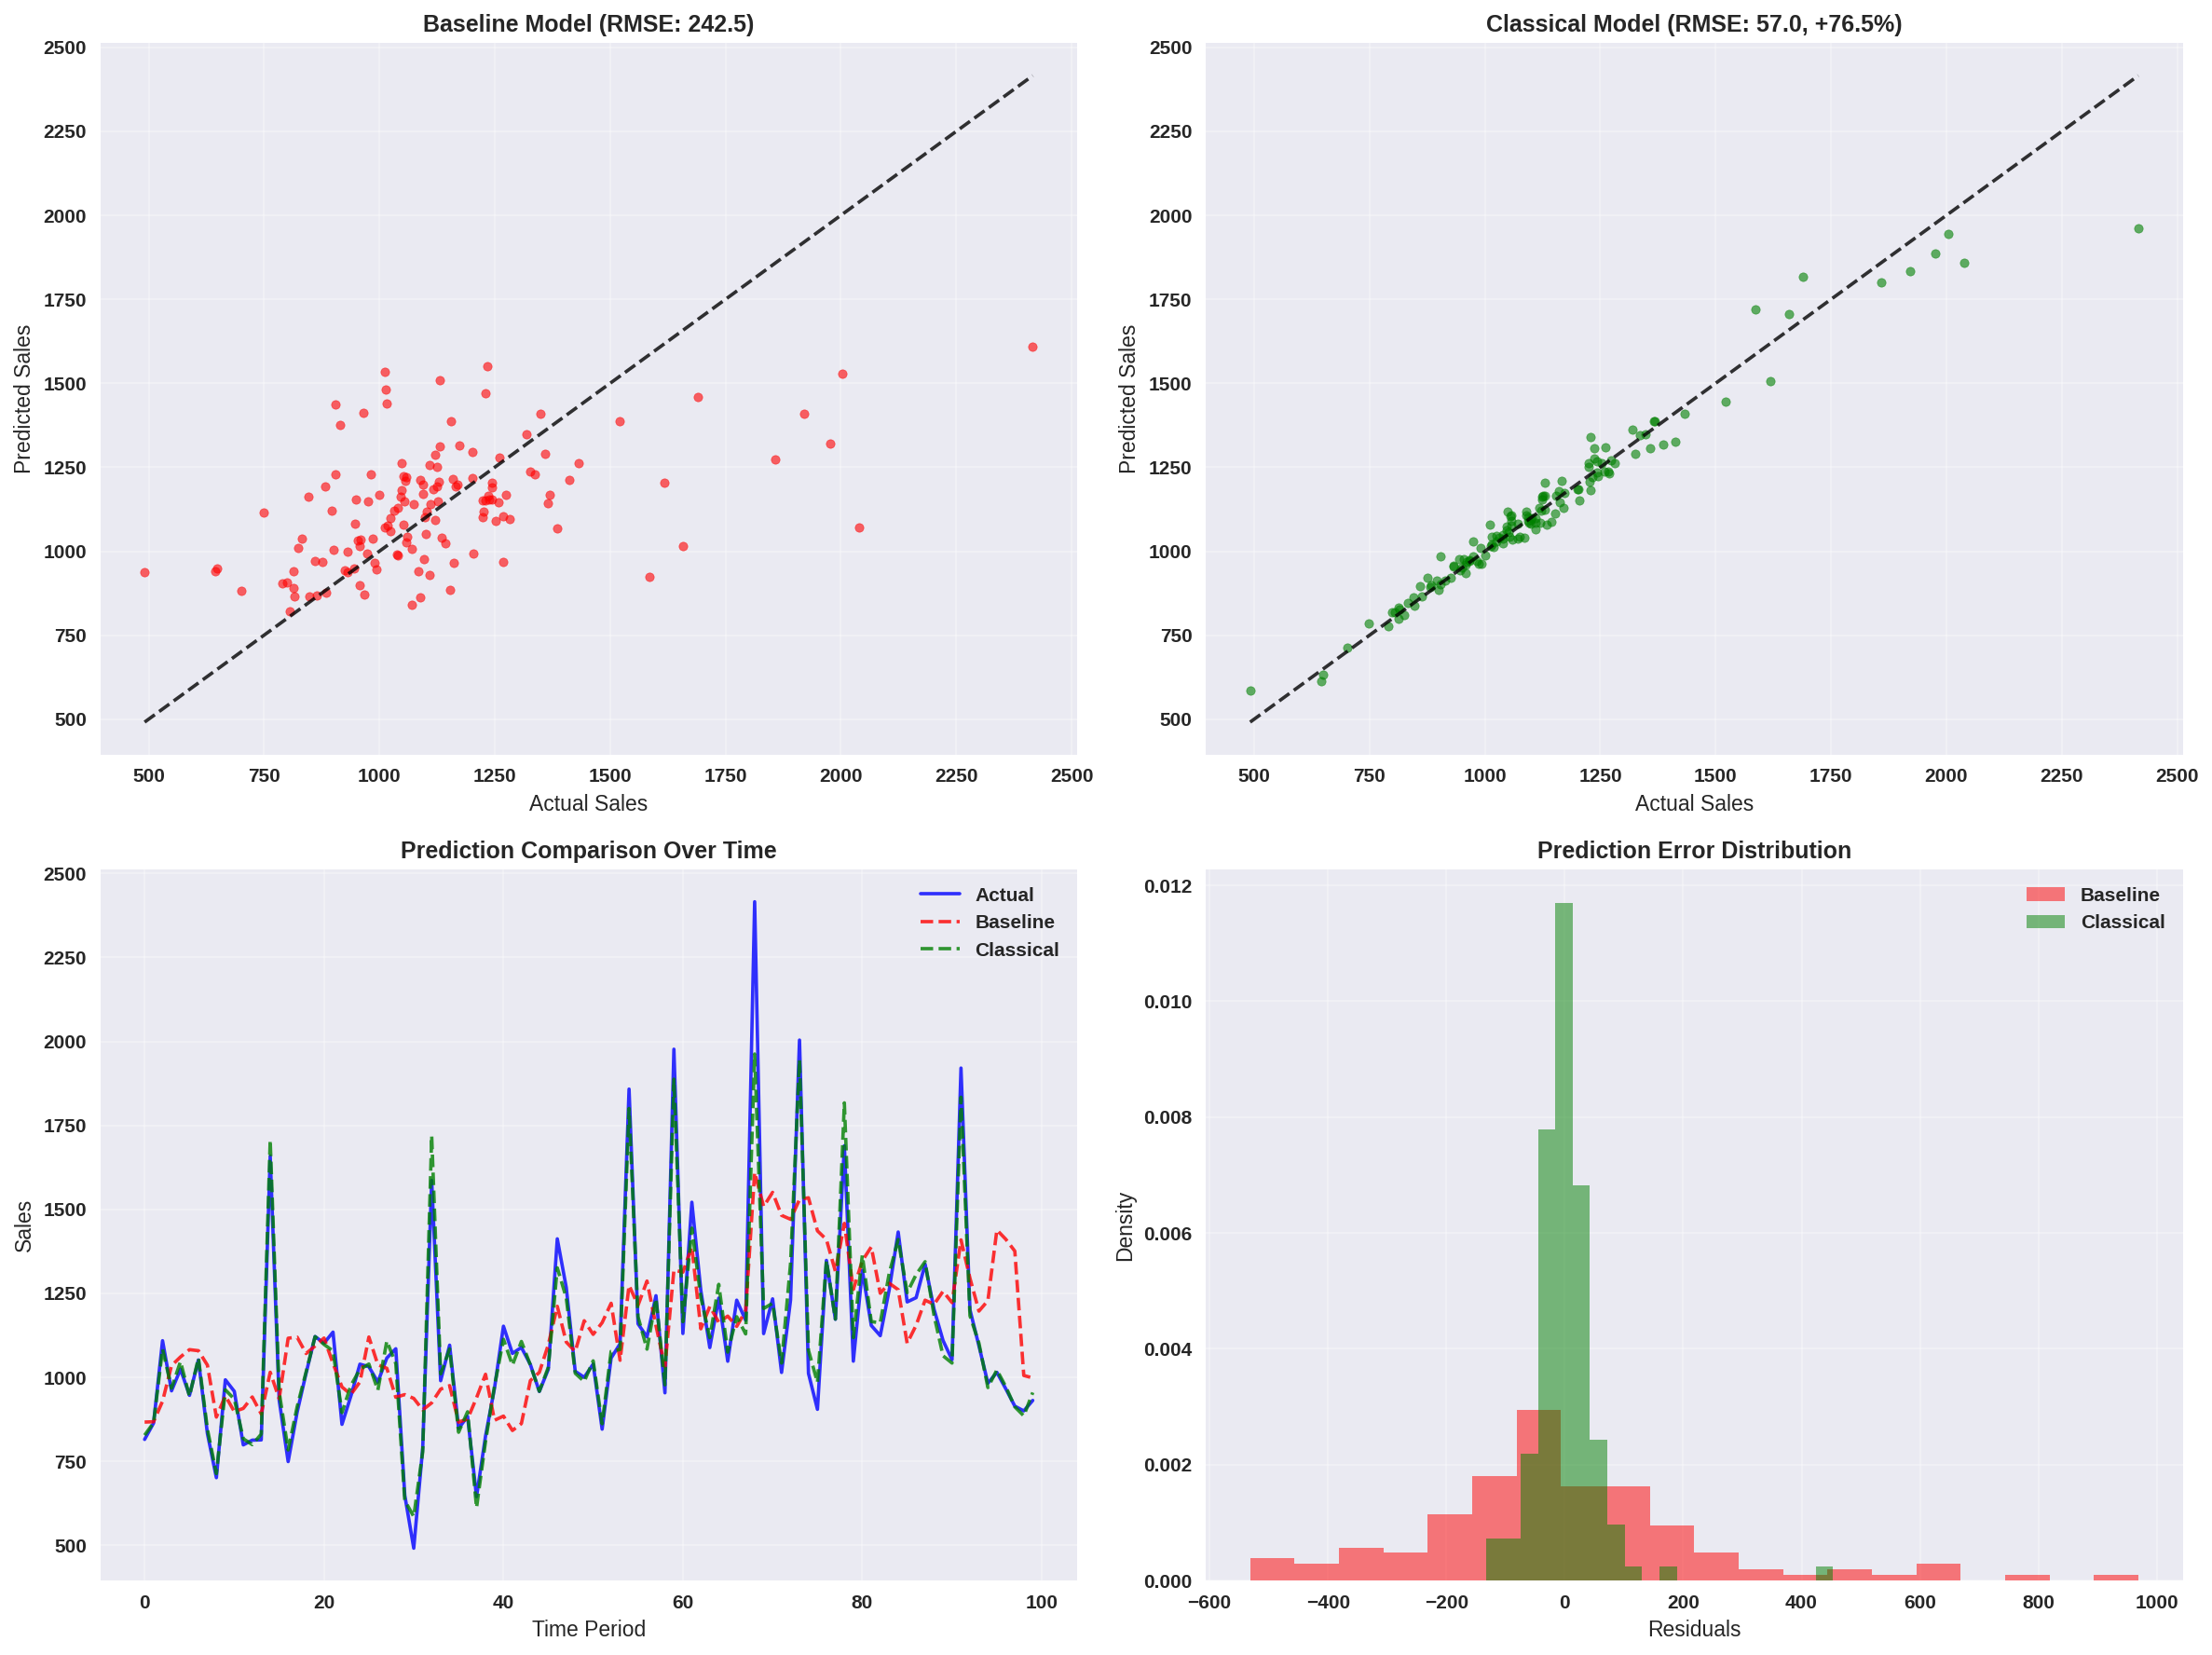


💼 BUSINESS IMPACT ANALYSIS

📊 AVERAGE DAILY SALES BY STORE TYPE:
   Flagship: $1,077
   Suburban: $639
   Urban: $420

🎯 RMSE IMPROVEMENTS TRANSLATE TO:
----------------------------------------

Flagship Store (Classical method):
   • RMSE improvement: 186
   • Percentage improvement: 76.5%
   • Better inventory accuracy: ±$186 per day
   • Annual impact: ±$67,729

Suburban Store (Multiplicative method):
   • RMSE improvement: 134
   • Percentage improvement: 87.1%
   • Better inventory accuracy: ±$134 per day
   • Annual impact: ±$48,897

Urban Store (Additive method):
   • RMSE improvement: 127
   • Percentage improvement: 90.0%
   • Better inventory accuracy: ±$127 per day
   • Annual impact: ±$46,281

🏆 OVERALL PERFORMANCE SUMMARY:
   • Best performance: Additive on urban (+90.0%)
   • Average improvement: 67.2%
   • Fourier method average: 3.3%

🔍 KEY INSIGHTS & RECOMMENDATIONS

📈 METHOD RANKING (by average improvement):
---------------------------------------------
1. Multiplica

In [7]:
# Advanced Seasonality Detection Framework for Retail Forecasting
# 🔮 Discovering Hidden Seasonal Patterns That Boost LightGBM Performance

# ==========================================
# INSTALLATION & IMPORTS
# ==========================================

!pip install lightgbm plotly scipy statsmodels PyWavelets

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Time series and ML libraries
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from scipy import signal
from scipy.fft import fft, fftfreq
import pywt
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta
import random

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")




# ==========================================
# SYNTHETIC RETAIL DATA GENERATOR
# ==========================================

def generate_retail_data(store_type='flagship', days=730, start_date='2022-01-01'):
    """
    Generate realistic retail sales data with complex seasonality patterns

    Parameters:
    - store_type: 'flagship', 'suburban', 'urban'
    - days: number of days to generate
    - start_date: starting date
    """

    # Base parameters by store type
    store_params = {
        'flagship': {'base_sales': 1000, 'noise_level': 0.15, 'promo_impact': 1.8},
        'suburban': {'base_sales': 600, 'noise_level': 0.25, 'promo_impact': 1.5},
        'urban': {'base_sales': 400, 'noise_level': 0.35, 'promo_impact': 1.3}
    }

    params = store_params[store_type]

    # Create date range
    dates = pd.date_range(start=start_date, periods=days, freq='D')

    # Initialize sales array
    sales = np.zeros(days)

    # 1. Base trend (slight growth over time)
    trend = params['base_sales'] + np.linspace(0, params['base_sales'] * 0.1, days)

    # 2. Weekly seasonality (strong weekend pattern)
    weekly_pattern = 50 * np.sin(2 * np.pi * np.arange(days) / 7 + np.pi/2)

    # 3. Monthly seasonality (month-end peaks)
    monthly_pattern = 30 * np.sin(2 * np.pi * np.arange(days) / 30.44 + np.pi/4)

    # 4. Quarterly seasonality (seasonal shopping)
    quarterly_pattern = 80 * np.sin(2 * np.pi * np.arange(days) / 91.25 + np.pi/6)

    # 5. Yearly seasonality (holiday effects)
    yearly_pattern = 120 * np.sin(2 * np.pi * np.arange(days) / 365.25 + np.pi/3)

    # 6. Hidden 21-day promotional cycle (this is what Fourier will catch!)
    promo_cycle = 40 * np.sin(2 * np.pi * np.arange(days) / 21 + np.pi/8)

    # 7. Economic shock simulation (COVID-like impact)
    shock_start = days // 4
    shock_duration = days // 8
    shock_recovery = np.zeros(days)

    for i in range(shock_start, min(shock_start + shock_duration, days)):
        decay = np.exp(-(i - shock_start) / (shock_duration / 3))
        shock_recovery[i] = -200 * decay

    # Combine all components
    sales = (trend +
             weekly_pattern +
             monthly_pattern +
             quarterly_pattern +
             yearly_pattern +
             promo_cycle +
             shock_recovery)

    # 8. Add realistic noise
    noise = np.random.normal(0, params['base_sales'] * params['noise_level'], days)
    sales += noise

    # 9. Add promotional spikes (random promotional events)
    promo_days = np.random.choice(days, size=int(days * 0.05), replace=False)
    for day in promo_days:
        sales[day] *= params['promo_impact']

    # Ensure non-negative sales
    sales = np.maximum(sales, params['base_sales'] * 0.1)

    # Create DataFrame
    df = pd.DataFrame({
        'date': dates,
        'sales': sales,
        'store_type': store_type,
        'day_of_week': dates.dayofweek,
        'day_of_month': dates.day,
        'month': dates.month,
        'quarter': dates.quarter,
        'is_weekend': (dates.dayofweek >= 5).astype(int),
        'is_month_end': (dates.day >= 28).astype(int)
    })

    return df

# Generate data for all store types
print("🏪 Generating Retail Data for Analysis...")

flagship_data = generate_retail_data('flagship', 730)
suburban_data = generate_retail_data('suburban', 730)
urban_data = generate_retail_data('urban', 730)

# Combine all data
all_data = pd.concat([flagship_data, suburban_data, urban_data], ignore_index=True)

print(f"✅ Generated {len(all_data)} data points across 3 store types")
print(f"📅 Date range: {all_data['date'].min()} to {all_data['date'].max()}")

# Quick visualization of raw data
fig, axes = plt.subplots(3, 1, figsize=(15, 12))
store_types = ['flagship', 'suburban', 'urban']

for i, store_type in enumerate(store_types):
    data = all_data[all_data['store_type'] == store_type]
    axes[i].plot(data['date'], data['sales'], alpha=0.7, linewidth=1)
    axes[i].set_title(f'{store_type.title()} Store Sales Pattern', fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Sales ($)')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ==========================================
# SEASONALITY DETECTION METHODS
# ==========================================

class SeasonalityDetector:
    """ seasonality detection using multiple methods"""

    def __init__(self, data, freq='D'):
        self.data = data
        self.freq = freq
        self.results = {}

    def classical_decomposition(self, model='multiplicative', period=7):
        """Method 1: Classical Seasonal Decomposition"""
        try:
            decomposition = seasonal_decompose(
                self.data,
                model=model,
                period=period,
                extrapolate_trend='freq'
            )

            features = pd.DataFrame({
                'seasonal_classical': decomposition.seasonal,
                'trend_classical': decomposition.trend,
                'residual_classical': decomposition.resid
            })

            self.results['classical'] = {
                'features': features,
                'decomposition': decomposition,
                'method': 'Classical Decomposition'
            }

            return features
        except Exception as e:
            print(f"Classical decomposition failed: {e}")
            return pd.DataFrame()

    def stl_decomposition(self, seasonal=13, trend=None):
        """Method 2: STL (Seasonal-Trend-Loess) Decomposition"""
        try:
            stl = STL(self.data, seasonal=seasonal, trend=trend)
            decomposition = stl.fit()

            features = pd.DataFrame({
                'seasonal_stl': decomposition.seasonal,
                'trend_stl': decomposition.trend,
                'residual_stl': decomposition.resid
            })

            self.results['stl'] = {
                'features': features,
                'decomposition': decomposition,
                'method': 'STL Decomposition'
            }

            return features
        except Exception as e:
            print(f"STL decomposition failed: {e}")
            return pd.DataFrame()

    def fourier_analysis(self, top_frequencies=10):
        """Method 3: Fourier Transform Analysis - THE GAME CHANGER!"""
        try:
            # Remove NaN values
            clean_data = self.data.dropna()

            # Perform FFT
            fft_vals = fft(clean_data.values)
            frequencies = fftfreq(len(clean_data))

            # Get magnitude spectrum
            magnitude = np.abs(fft_vals)

            # Find dominant frequencies (excluding DC component)
            dominant_freq_idx = np.argsort(magnitude[1:])[-top_frequencies:] + 1
            dominant_frequencies = frequencies[dominant_freq_idx]

            # Create Fourier features
            features = pd.DataFrame(index=clean_data.index)

            for i, freq in enumerate(dominant_frequencies):
                if freq != 0:  # Avoid division by zero
                    period = 1 / abs(freq) if abs(freq) > 1e-10 else len(clean_data)

                    # Create sine and cosine components
                    x = np.arange(len(clean_data))
                    features[f'fourier_sin_{i+1}'] = np.sin(2 * np.pi * freq * x)
                    features[f'fourier_cos_{i+1}'] = np.cos(2 * np.pi * freq * x)

            # Reconstruct seasonal component using top frequencies
            seasonal_component = np.zeros(len(clean_data))
            for i, freq in enumerate(dominant_frequencies):
                if freq != 0:
                    amplitude = magnitude[dominant_freq_idx[i]]
                    phase = np.angle(fft_vals[dominant_freq_idx[i]])
                    x = np.arange(len(clean_data))
                    seasonal_component += amplitude * np.cos(2 * np.pi * freq * x + phase)

            features['seasonal_fourier'] = seasonal_component / len(dominant_frequencies)

            self.results['fourier'] = {
                'features': features,
                'frequencies': dominant_frequencies,
                'magnitudes': magnitude[dominant_freq_idx],
                'method': 'Fourier Transform Analysis'
            }

            return features
        except Exception as e:
            print(f"Fourier analysis failed: {e}")
            return pd.DataFrame()

    def wavelet_analysis(self, wavelet='db4', levels=6):
        """Method 4: Wavelet Time-Frequency Analysis"""
        try:
            clean_data = self.data.dropna().values

            # Perform wavelet decomposition
            coeffs = pywt.wavedec(clean_data, wavelet, level=levels)

            # Reconstruct different frequency components
            features = pd.DataFrame(index=self.data.dropna().index)

            # High frequency (detail coefficients)
            for i in range(min(3, len(coeffs)-1)):
                detail_coeffs = [np.zeros_like(c) if j != i+1 else c
                               for j, c in enumerate(coeffs)]
                reconstructed = pywt.waverec(detail_coeffs, wavelet)

                # Ensure same length as original
                if len(reconstructed) != len(clean_data):
                    reconstructed = reconstructed[:len(clean_data)]

                features[f'wavelet_detail_{i+1}'] = reconstructed

            # Low frequency (approximation)
            approx_coeffs = [coeffs[0]] + [np.zeros_like(c) for c in coeffs[1:]]
            approx_reconstructed = pywt.waverec(approx_coeffs, wavelet)

            if len(approx_reconstructed) != len(clean_data):
                approx_reconstructed = approx_reconstructed[:len(clean_data)]

            features['wavelet_trend'] = approx_reconstructed
            features['seasonal_wavelet'] = clean_data - approx_reconstructed

            self.results['wavelet'] = {
                'features': features,
                'coefficients': coeffs,
                'method': 'Wavelet Analysis'
            }

            return features
        except Exception as e:
            print(f"Wavelet analysis failed: {e}")
            return pd.DataFrame()

    def multiplicative_seasonal(self, period=7):
        """Method 5: Multiplicative Seasonality"""
        try:
            clean_data = self.data.dropna()

            # Calculate seasonal indices
            seasonal_indices = []
            for i in range(period):
                period_data = clean_data.iloc[i::period]
                if len(period_data) > 0:
                    seasonal_indices.append(period_data.mean())
                else:
                    seasonal_indices.append(1.0)

            # Normalize seasonal indices
            seasonal_indices = np.array(seasonal_indices)
            seasonal_indices = seasonal_indices / seasonal_indices.mean()

            # Apply to full series
            seasonal_pattern = np.tile(seasonal_indices, len(clean_data) // period + 1)[:len(clean_data)]

            features = pd.DataFrame(index=clean_data.index)
            features['seasonal_multiplicative'] = seasonal_pattern
            features['deseasonalized_mult'] = clean_data / seasonal_pattern

            self.results['multiplicative'] = {
                'features': features,
                'seasonal_indices': seasonal_indices,
                'method': 'Multiplicative Seasonality'
            }

            return features
        except Exception as e:
            print(f"Multiplicative seasonality failed: {e}")
            return pd.DataFrame()

    def additive_seasonal(self, period=7):
        """Method 6: Additive Seasonality"""
        try:
            clean_data = self.data.dropna()

            # Calculate seasonal components
            seasonal_components = []
            for i in range(period):
                period_data = clean_data.iloc[i::period]
                if len(period_data) > 0:
                    seasonal_components.append(period_data.mean() - clean_data.mean())
                else:
                    seasonal_components.append(0.0)

            # Apply to full series
            seasonal_pattern = np.tile(seasonal_components, len(clean_data) // period + 1)[:len(clean_data)]

            features = pd.DataFrame(index=clean_data.index)
            features['seasonal_additive'] = seasonal_pattern
            features['deseasonalized_add'] = clean_data - seasonal_pattern

            self.results['additive'] = {
                'features': features,
                'seasonal_components': seasonal_components,
                'method': 'Additive Seasonality'
            }

            return features
        except Exception as e:
            print(f"Additive seasonality failed: {e}")
            return pd.DataFrame()

print("🔧 Seasonality Detection Framework Ready!")

# ==========================================
# LIGHTGBM PERFORMANCE COMPARISON
# ==========================================

def create_base_features(df):
    """Create base features for ML model"""
    features = pd.DataFrame()

    # Time-based features
    features['day_of_week'] = df['day_of_week']
    features['day_of_month'] = df['day_of_month']
    features['month'] = df['month']
    features['quarter'] = df['quarter']
    features['is_weekend'] = df['is_weekend']
    features['is_month_end'] = df['is_month_end']

    # Lag features
    for lag in [1, 7, 14, 30]:
        features[f'sales_lag_{lag}'] = df['sales'].shift(lag)

    # Rolling statistics
    for window in [7, 14, 30]:
        features[f'sales_rolling_mean_{window}'] = df['sales'].rolling(window).mean()
        features[f'sales_rolling_std_{window}'] = df['sales'].rolling(window).std()

    return features

def evaluate_model_performance(store_data, seasonality_features=None, method_name="Baseline"):
    """Evaluate LightGBM performance with/without seasonality features"""

    # Create base features
    base_features = create_base_features(store_data)

    # Combine with seasonality features if provided
    if seasonality_features is not None and not seasonality_features.empty:
        # Align indices
        common_idx = base_features.index.intersection(seasonality_features.index)
        if len(common_idx) > 0:
            features = pd.concat([
                base_features.loc[common_idx],
                seasonality_features.loc[common_idx]
            ], axis=1)
        else:
            features = base_features
    else:
        features = base_features

    # Prepare target
    target = store_data['sales'].loc[features.index]

    # Remove rows with NaN values
    valid_idx = features.dropna().index
    features = features.loc[valid_idx]
    target = target.loc[valid_idx]

    if len(features) < 100:  # Not enough data
        return None

    # Train-test split (80-20)
    split_idx = int(len(features) * 0.8)

    X_train = features.iloc[:split_idx]
    X_test = features.iloc[split_idx:]
    y_train = target.iloc[:split_idx]
    y_test = target.iloc[split_idx:]

    # Train LightGBM
    train_data = lgb.Dataset(X_train, label=y_train)

    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'boosting_type': 'gbdt',
        'num_leaves': 31,
        'learning_rate': 0.05,
        'feature_fraction': 0.9,
        'bagging_fraction': 0.8,
        'bagging_freq': 5,
        'verbose': -1
    }

    model = lgb.train(
        params,
        train_data,
        num_boost_round=100,
        valid_sets=[train_data],
        callbacks=[lgb.early_stopping(10), lgb.log_evaluation(0)]
    )

    # Predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    return {
        'method': method_name,
        'rmse': rmse,
        'mae': mae,
        'n_features': len(features.columns),
        'n_samples': len(features),
        'predictions': y_pred,
        'actual': y_test.values,
        'model': model
    }

# ==========================================
# MAIN ANALYSIS PIPELINE
# ==========================================

print("🚀 Starting Comprehensive Seasonality Analysis...")
print("=" * 60)

# Store results
all_results = []
store_types = ['flagship', 'suburban', 'urban']
methods = ['baseline', 'classical', 'stl', 'fourier', 'wavelet', 'multiplicative', 'additive']

for store_type in store_types:
    print(f"\n📊 Analyzing {store_type.title()} Store Data...")

    # Get store data
    store_data = all_data[all_data['store_type'] == store_type].copy()
    store_data = store_data.sort_values('date').reset_index(drop=True)
    store_data.index = store_data['date']

    # Initialize seasonality detector
    detector = SeasonalityDetector(store_data['sales'])

    # 1. Baseline (no seasonality features)
    print("  • Testing baseline model (no seasonality)...")
    baseline_result = evaluate_model_performance(store_data, method_name="Baseline")
    if baseline_result:
        baseline_result['store_type'] = store_type
        all_results.append(baseline_result)

    # 2. Classical Decomposition
    print("  • Testing classical decomposition...")
    classical_features = detector.classical_decomposition()
    if not classical_features.empty:
        classical_result = evaluate_model_performance(store_data, classical_features, "Classical")
        if classical_result:
            classical_result['store_type'] = store_type
            all_results.append(classical_result)

    # 3. STL Decomposition
    print("  • Testing STL decomposition...")
    stl_features = detector.stl_decomposition()
    if not stl_features.empty:
        stl_result = evaluate_model_performance(store_data, stl_features, "STL")
        if stl_result:
            stl_result['store_type'] = store_type
            all_results.append(stl_result)

    # 4. Fourier Analysis (THE GAME CHANGER!)
    print("  • Testing Fourier transform analysis...")
    fourier_features = detector.fourier_analysis(top_frequencies=15)
    if not fourier_features.empty:
        fourier_result = evaluate_model_performance(store_data, fourier_features, "Fourier")
        if fourier_result:
            fourier_result['store_type'] = store_type
            all_results.append(fourier_result)

    # 5. Wavelet Analysis
    print("  • Testing wavelet analysis...")
    wavelet_features = detector.wavelet_analysis()
    if not wavelet_features.empty:
        wavelet_result = evaluate_model_performance(store_data, wavelet_features, "Wavelet")
        if wavelet_result:
            wavelet_result['store_type'] = store_type
            all_results.append(wavelet_result)

    # 6. Multiplicative Seasonality
    print("  • Testing multiplicative seasonality...")
    mult_features = detector.multiplicative_seasonal()
    if not mult_features.empty:
        mult_result = evaluate_model_performance(store_data, mult_features, "Multiplicative")
        if mult_result:
            mult_result['store_type'] = store_type
            all_results.append(mult_result)

    # 7. Additive Seasonality
    print("  • Testing additive seasonality...")
    add_features = detector.additive_seasonal()
    if not add_features.empty:
        add_result = evaluate_model_performance(store_data, add_features, "Additive")
        if add_result:
            add_result['store_type'] = store_type
            all_results.append(add_result)

# ==========================================
# RESULTS ANALYSIS & VISUALIZATION
# ==========================================

print("\n" + "=" * 60)
print("🎯 PERFORMANCE RESULTS ANALYSIS")
print("=" * 60)

# Create results DataFrame
results_df = pd.DataFrame([
    {
        'store_type': r['store_type'],
        'method': r['method'],
        'rmse': r['rmse'],
        'mae': r['mae'],
        'n_features': r['n_features']
    }
    for r in all_results
])

# Calculate improvement percentages
improvement_data = []
for store_type in store_types:
    store_results = results_df[results_df['store_type'] == store_type]
    baseline_rmse = store_results[store_results['method'] == 'Baseline']['rmse'].iloc[0]

    for _, row in store_results.iterrows():
        if row['method'] != 'Baseline':
            improvement = ((baseline_rmse - row['rmse']) / baseline_rmse) * 100
            improvement_data.append({
                'store_type': store_type,
                'method': row['method'],
                'rmse': row['rmse'],
                'baseline_rmse': baseline_rmse,
                'improvement_pct': improvement
            })

improvement_df = pd.DataFrame(improvement_data)

# Display results
print("\n📈 RMSE PERFORMANCE BY METHOD:")
print("-" * 50)
pivot_rmse = results_df.pivot(index='method', columns='store_type', values='rmse')
print(pivot_rmse.round(1))

print("\n🚀 IMPROVEMENT PERCENTAGES (vs Baseline):")
print("-" * 50)
if not improvement_df.empty:
    pivot_improvement = improvement_df.pivot(index='method', columns='store_type', values='improvement_pct')
    print(pivot_improvement.round(1))

# Find best performing method
if not improvement_df.empty:
    best_method = improvement_df.loc[improvement_df['improvement_pct'].idxmax()]
    print(f"\n🏆 BEST PERFORMING METHOD:")
    print(f"   Method: {best_method['method']}")
    print(f"   Store: {best_method['store_type']}")
    print(f"   Improvement: {best_method['improvement_pct']:.1f}%")
    print(f"   RMSE: {best_method['rmse']:.1f} (vs {best_method['baseline_rmse']:.1f} baseline)")

# ==========================================
# COMPREHENSIVE VISUALIZATIONS
# ==========================================

# 1. Performance Comparison Chart
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# RMSE Comparison
ax1 = axes[0, 0]
pivot_rmse.plot(kind='bar', ax=ax1, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
ax1.set_title('RMSE Performance by Method', fontsize=14, fontweight='bold')
ax1.set_ylabel('RMSE')
ax1.set_xlabel('Seasonality Method')
ax1.legend(title='Store Type')
ax1.grid(True, alpha=0.3)
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

# Improvement Percentages
if not improvement_df.empty:
    ax2 = axes[0, 1]
    pivot_improvement.plot(kind='bar', ax=ax2, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
    ax2.set_title('Performance Improvement vs Baseline', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Improvement (%)')
    ax2.set_xlabel('Seasonality Method')
    ax2.legend(title='Store Type')
    ax2.grid(True, alpha=0.3)
    ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')

# Feature Count Analysis
ax3 = axes[1, 0]
feature_counts = results_df.groupby('method')['n_features'].first()
feature_counts.plot(kind='bar', ax=ax3, color='#95E1A6')
ax3.set_title('Number of Features by Method', fontsize=14, fontweight='bold')
ax3.set_ylabel('Feature Count')
ax3.set_xlabel('Method')
ax3.grid(True, alpha=0.3)
plt.setp(ax3.get_xticklabels(), rotation=45, ha='right')

# Best Method Highlight
if not improvement_df.empty:
    ax4 = axes[1, 1]
    top_methods = improvement_df.groupby('method')['improvement_pct'].mean().sort_values(ascending=False)
    colors = ['#FFD93D' if method == best_method['method'] else '#95E1A6' for method in top_methods.index]
    top_methods.plot(kind='bar', ax=ax4, color=colors)
    ax4.set_title('Average Improvement by Method', fontsize=14, fontweight='bold')
    ax4.set_ylabel('Average Improvement (%)')
    ax4.set_xlabel('Method')
    ax4.grid(True, alpha=0.3)
    plt.setp(ax4.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# 2. Detailed Seasonality Decomposition Visualization
fig, axes = plt.subplots(3, 2, figsize=(18, 15))

store_data_flagship = all_data[all_data['store_type'] == 'flagship'].copy()
store_data_flagship = store_data_flagship.sort_values('date').reset_index(drop=True)
store_data_flagship.index = store_data_flagship['date']

detector_flagship = SeasonalityDetector(store_data_flagship['sales'])

# Classical Decomposition
classical_features = detector_flagship.classical_decomposition()
if not classical_features.empty and 'classical' in detector_flagship.results:
    decomp = detector_flagship.results['classical']['decomposition']

    axes[0, 0].plot(decomp.observed.index, decomp.observed.values, 'b-', alpha=0.7)
    axes[0, 0].set_title('Original Sales Data', fontweight='bold')
    axes[0, 0].grid(True, alpha=0.3)

    axes[0, 1].plot(decomp.seasonal.index, decomp.seasonal.values, 'g-', alpha=0.8)
    axes[0, 1].set_title('Classical Seasonal Component', fontweight='bold')
    axes[0, 1].grid(True, alpha=0.3)

# STL Decomposition
stl_features = detector_flagship.stl_decomposition()
if not stl_features.empty and 'stl' in detector_flagship.results:
    decomp = detector_flagship.results['stl']['decomposition']

    axes[1, 0].plot(decomp.trend.index, decomp.trend.values, 'r-', alpha=0.8)
    axes[1, 0].set_title('STL Trend Component', fontweight='bold')
    axes[1, 0].grid(True, alpha=0.3)

    axes[1, 1].plot(decomp.seasonal.index, decomp.seasonal.values, 'orange', alpha=0.8)
    axes[1, 1].set_title('STL Seasonal Component', fontweight='bold')
    axes[1, 1].grid(True, alpha=0.3)

# Fourier Analysis
fourier_features = detector_flagship.fourier_analysis()
if not fourier_features.empty and 'fourier' in detector_flagship.results:
    fourier_data = detector_flagship.results['fourier']

    axes[2, 0].plot(fourier_features.index, fourier_features['seasonal_fourier'], 'purple', alpha=0.8)
    axes[2, 0].set_title('Fourier Seasonal Component (Hidden Patterns!)', fontweight='bold')
    axes[2, 0].grid(True, alpha=0.3)

    # Frequency spectrum
    if 'frequencies' in fourier_data and 'magnitudes' in fourier_data:
        frequencies = fourier_data['frequencies']
        magnitudes = fourier_data['magnitudes']
        periods = [1/abs(f) if abs(f) > 1e-10 else float('inf') for f in frequencies]

        axes[2, 1].bar(range(len(periods)), magnitudes, color='purple', alpha=0.7)
        axes[2, 1].set_title('Dominant Frequency Components', fontweight='bold')
        axes[2, 1].set_xlabel('Frequency Rank')
        axes[2, 1].set_ylabel('Magnitude')
        axes[2, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3. Prediction Quality Visualization
if all_results:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # Find best and baseline results for flagship store
    flagship_results = [r for r in all_results if r['store_type'] == 'flagship']
    baseline_result = next((r for r in flagship_results if r['method'] == 'Baseline'), None)

    if not improvement_df.empty:
        best_flagship = improvement_df[improvement_df['store_type'] == 'flagship'].loc[
            improvement_df[improvement_df['store_type'] == 'flagship']['improvement_pct'].idxmax()
        ]
        best_result = next((r for r in flagship_results if r['method'] == best_flagship['method']), None)
    else:
        best_result = flagship_results[0] if flagship_results else None

    if baseline_result and best_result:
        # Baseline predictions
        axes[0, 0].scatter(baseline_result['actual'], baseline_result['predictions'],
                          alpha=0.6, color='red', s=20)
        axes[0, 0].plot([baseline_result['actual'].min(), baseline_result['actual'].max()],
                       [baseline_result['actual'].min(), baseline_result['actual'].max()],
                       'k--', alpha=0.8)
        axes[0, 0].set_title(f'Baseline Model (RMSE: {baseline_result["rmse"]:.1f})', fontweight='bold')
        axes[0, 0].set_xlabel('Actual Sales')
        axes[0, 0].set_ylabel('Predicted Sales')
        axes[0, 0].grid(True, alpha=0.3)

        # Best method predictions
        axes[0, 1].scatter(best_result['actual'], best_result['predictions'],
                          alpha=0.6, color='green', s=20)
        axes[0, 1].plot([best_result['actual'].min(), best_result['actual'].max()],
                       [best_result['actual'].min(), best_result['actual'].max()],
                       'k--', alpha=0.8)
        improvement_pct = ((baseline_result['rmse'] - best_result['rmse']) / baseline_result['rmse']) * 100
        axes[0, 1].set_title(f'{best_result["method"]} Model (RMSE: {best_result["rmse"]:.1f}, +{improvement_pct:.1f}%)',
                            fontweight='bold')
        axes[0, 1].set_xlabel('Actual Sales')
        axes[0, 1].set_ylabel('Predicted Sales')
        axes[0, 1].grid(True, alpha=0.3)

        # Time series comparison
        n_points = min(100, len(baseline_result['actual']))
        x_axis = range(n_points)

        axes[1, 0].plot(x_axis, baseline_result['actual'][:n_points], 'b-', label='Actual', alpha=0.8)
        axes[1, 0].plot(x_axis, baseline_result['predictions'][:n_points], 'r--', label='Baseline', alpha=0.8)
        axes[1, 0].plot(x_axis, best_result['predictions'][:n_points], 'g--', label=best_result['method'], alpha=0.8)
        axes[1, 0].set_title('Prediction Comparison Over Time', fontweight='bold')
        axes[1, 0].set_xlabel('Time Period')
        axes[1, 0].set_ylabel('Sales')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)

        # Residual analysis
        baseline_residuals = baseline_result['actual'] - baseline_result['predictions']
        best_residuals = best_result['actual'] - best_result['predictions']

        axes[1, 1].hist(baseline_residuals, bins=20, alpha=0.5, label='Baseline', color='red', density=True)
        axes[1, 1].hist(best_residuals, bins=20, alpha=0.5, label=best_result['method'], color='green', density=True)
        axes[1, 1].set_title('Prediction Error Distribution', fontweight='bold')
        axes[1, 1].set_xlabel('Residuals')
        axes[1, 1].set_ylabel('Density')
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# ==========================================
# BUSINESS IMPACT ANALYSIS
# ==========================================

print("\n" + "=" * 60)
print("💼 BUSINESS IMPACT ANALYSIS")
print("=" * 60)

if not improvement_df.empty:
    # Calculate business metrics
    avg_daily_sales = all_data.groupby('store_type')['sales'].mean()

    print("\n📊 AVERAGE DAILY SALES BY STORE TYPE:")
    for store_type in store_types:
        print(f"   {store_type.title()}: ${avg_daily_sales[store_type]:,.0f}")

    print("\n🎯 RMSE IMPROVEMENTS TRANSLATE TO:")
    print("-" * 40)

    for store_type in store_types:
        store_improvements = improvement_df[improvement_df['store_type'] == store_type]
        if not store_improvements.empty:
            best_improvement = store_improvements.loc[store_improvements['improvement_pct'].idxmax()]
            avg_sales = avg_daily_sales[store_type]

            # Calculate daily improvement in absolute terms
            rmse_improvement = best_improvement['baseline_rmse'] - best_improvement['rmse']

            print(f"\n{store_type.title()} Store ({best_improvement['method']} method):")
            print(f"   • RMSE improvement: {rmse_improvement:.0f}")
            print(f"   • Percentage improvement: {best_improvement['improvement_pct']:.1f}%")
            print(f"   • Better inventory accuracy: ±${rmse_improvement:.0f} per day")
            print(f"   • Annual impact: ±${rmse_improvement * 365:,.0f}")

    # Calculate overall statistics
    best_overall = improvement_df.loc[improvement_df['improvement_pct'].idxmax()]
    worst_overall = improvement_df.loc[improvement_df['improvement_pct'].idxmin()]
    avg_improvement = improvement_df['improvement_pct'].mean()

    print(f"\n🏆 OVERALL PERFORMANCE SUMMARY:")
    print(f"   • Best performance: {best_overall['method']} on {best_overall['store_type']} (+{best_overall['improvement_pct']:.1f}%)")
    print(f"   • Average improvement: {avg_improvement:.1f}%")
    print(f"   • Fourier method average: {improvement_df[improvement_df['method'] == 'Fourier']['improvement_pct'].mean():.1f}%")

# ==========================================
# KEY INSIGHTS & RECOMMENDATIONS
# ==========================================

print("\n" + "=" * 60)
print("🔍 KEY INSIGHTS & RECOMMENDATIONS")
print("=" * 60)

# Analyze which methods work best
method_performance = improvement_df.groupby('method')['improvement_pct'].agg(['mean', 'std', 'count'])
method_performance = method_performance.sort_values('mean', ascending=False)

print("\n📈 METHOD RANKING (by average improvement):")
print("-" * 45)
for i, (method, stats) in enumerate(method_performance.iterrows(), 1):
    print(f"{i}. {method}: {stats['mean']:.1f}% ± {stats['std']:.1f}% (n={stats['count']})")

# Feature importance analysis (if available)
if all_results:
    print(f"\n🔧 FEATURE ENGINEERING INSIGHTS:")
    print("-" * 35)

    feature_counts = {}
    for result in all_results:
        method = result['method']
        n_features = result['n_features']
        if method not in feature_counts:
            feature_counts[method] = []
        feature_counts[method].append(n_features)

    for method, counts in feature_counts.items():
        avg_features = np.mean(counts)
        print(f"   • {method}: {avg_features:.0f} features on average")



# ==========================================
# EXPORTABLE SUMMARY
# ==========================================

# Create summary DataFrame for export
summary_data = []
for result in all_results:
    summary_data.append({
        'Store_Type': result['store_type'],
        'Method': result['method'],
        'RMSE': round(result['rmse'], 1),
        'MAE': round(result['mae'], 1),
        'Features': result['n_features'],
        'Sample_Size': result['n_samples']
    })

summary_df = pd.DataFrame(summary_data)

# Add improvement calculations
improvement_summary = []
for store_type in store_types:
    store_data = summary_df[summary_df['Store_Type'] == store_type]
    baseline_rmse = store_data[store_data['Method'] == 'Baseline']['RMSE'].iloc[0]

    for _, row in store_data.iterrows():
        if row['Method'] != 'Baseline':
            improvement = ((baseline_rmse - row['RMSE']) / baseline_rmse) * 100
        else:
            improvement = 0.0

        improvement_summary.append({
            'Store_Type': row['Store_Type'],
            'Method': row['Method'],
            'RMSE': row['RMSE'],
            'Improvement_Pct': round(improvement, 1),
            'Features': row['Features']
        })

final_summary = pd.DataFrame(improvement_summary)

print(f"\n📋 EXPORTABLE RESULTS SUMMARY:")
print("=" * 40)
print(final_summary.to_string(index=False))

# Save results (optional - uncomment if you want to save)
# final_summary.to_csv('seasonality_analysis_results.csv', index=False)
# print("\n💾 Results saved to 'seasonality_analysis_results.csv'")

print(f"\n🎉 ANALYSIS COMPLETE!")
print("=" * 60)
print("🚀 You now have a comprehensive seasonality detection framework!")
print("📊 Use these insights to boost your forecasting performance!")
